In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [3]:
len(x_train)

60000

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train[0].shape

(28, 28)

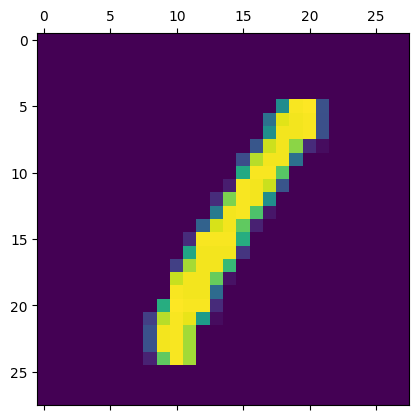

In [6]:
plt.matshow(x_train[3])

In [7]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_train_flatten.shape

(60000, 784)

In [8]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)
model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6627 - accuracy: 0.8319
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3453 - accuracy: 0.9039
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2958 - accuracy: 0.9160
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2645 - accuracy: 0.9258
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2414 - accuracy: 0.9325


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2240 - accuracy: 0.9358


[0.2239709198474884, 0.9358000159263611]

In [12]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
np.argmax(y_predicted[3])

0

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    3,    9,    1,    2,    0],
       [   0, 1111,    2,    2,    0,    1,    4,    2,   13,    0],
       [   9,    5,  944,   10,   11,    3,   11,   11,   25,    3],
       [   3,    1,   18,  924,    0,   23,    2,   14,   20,    5],
       [   1,    1,    3,    1,  944,    0,    9,    2,    4,   17],
       [  10,    2,    2,   27,    6,  804,   14,    5,   15,    7],
       [  11,    3,    4,    0,   12,   10,  913,    1,    4,    0],
       [   4,    9,   25,    5,    6,    0,    0,  957,    2,   20],
       [   7,    5,    4,   14,    8,   14,   14,   10,  891,    7],
       [  12,    8,    1,   11,   40,    8,    1,   14,    6,  908]])>

<Axes: >

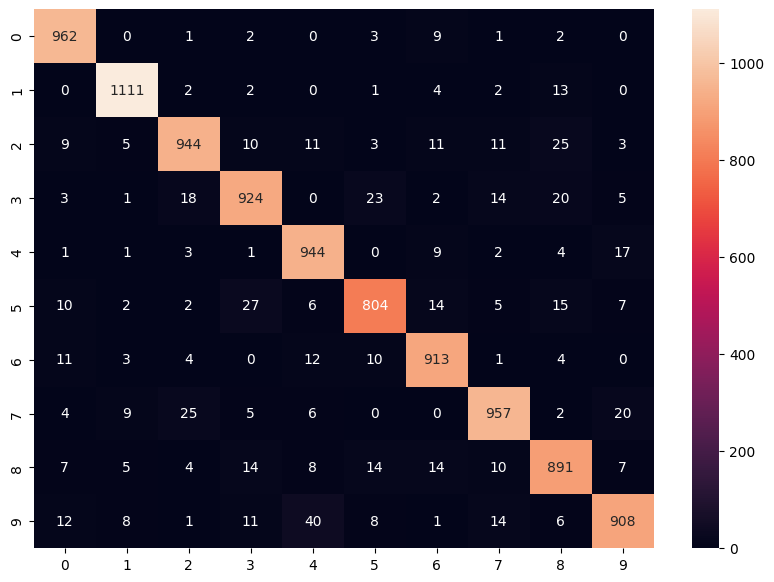

In [16]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')

In [17]:
%load_ext tensorboard
%tensorboard --logdir logs/train

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.